In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 183s 1us/step


2. Adım => Normalizasyon Adımı

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

3. Adım => Modeli Oluştur

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

4. Adım => İzlenecek optimize ediciyi, kayıp fonksiyonunu ve metrikleri belirterek modeli derliyoruz.

In [7]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

5. Adım => Modelin eğitilmesi

In [10]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7442 - accuracy: 0.7383 - val_loss: 0.8694 - val_accuracy: 0.7086
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6963 - accuracy: 0.7560 - val_loss: 0.8869 - val_accuracy: 0.7014
Epoch 3/30
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6518 - accuracy: 0.7708 - val_loss: 0.8516 - val_accuracy: 0.7187
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6173 - accuracy: 0.7838 - val_loss: 0.9158 - val_accuracy: 0.6984
Epoch 5/30
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5792 - accuracy: 0.7962 - val_loss: 0.8951 - val_accuracy: 0.7134
Epoch 6/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5480 - accuracy: 0.8086 - val_loss: 0.9299 - val_accuracy: 0.7069
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5136 - accuracy: 0.8179 - val_loss: 0.9073 - val_ac

6. Adım => Çizdirmek

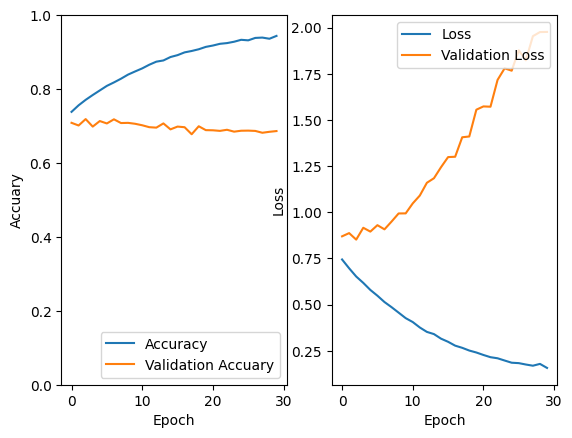

In [11]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuary')
plt.xlabel('Epoch')
plt.ylabel('Accuary')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

313/313 [==============================] - 1s 3ms/step


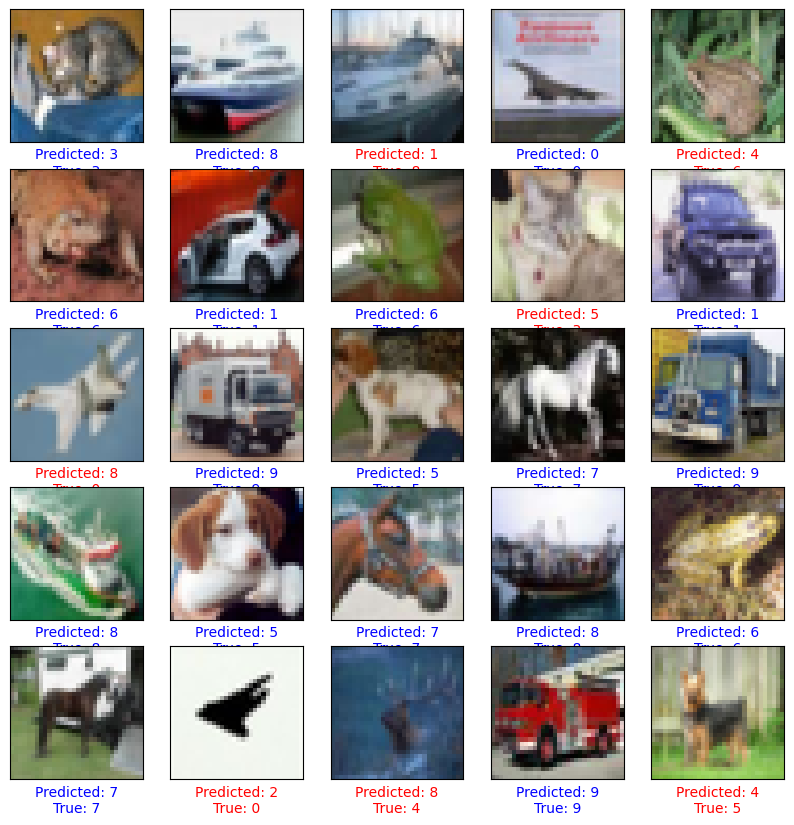

In [12]:
predictions = model.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap= plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = y_test[i].argmax()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}\nTrue: {true_label}', color=color)
plt.show()